In [15]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap

In [17]:
# Step 1: Load and analyze the dataset
data= pd.read_csv('/content/drive/MyDrive/RTA Dataset.csv')

# Display the first few rows of the dataset
print(data.head())

       Time Day_of_week Age_band_of_driver Sex_of_driver   Educational_level  \
0  17:02:00      Monday              18-30          Male   Above high school   
1  17:02:00      Monday              31-50          Male  Junior high school   
2  17:02:00      Monday              18-30          Male  Junior high school   
3   1:06:00      Sunday              18-30          Male  Junior high school   
4   1:06:00      Sunday              18-30          Male  Junior high school   

  Vehicle_driver_relation Driving_experience      Type_of_vehicle  \
0                Employee              1-2yr           Automobile   
1                Employee         Above 10yr  Public (> 45 seats)   
2                Employee              1-2yr      Lorry (41?100Q)   
3                Employee             5-10yr  Public (> 45 seats)   
4                Employee              2-5yr                  NaN   

  Owner_of_vehicle Service_year_of_vehicle  ... Vehicle_movement  \
0            Owner              Abov

In [18]:
# Check the shape of the dataset
data.shape

(12316, 32)

In [19]:
# Check the data types of the columns
data.dtypes

,0
Time,object
Day_of_week,object
Age_band_of_driver,object
Sex_of_driver,object
Educational_level,object
Vehicle_driver_relation,object
Driving_experience,object
Type_of_vehicle,object
Owner_of_vehicle,object
Service_year_of_vehicle,object


In [20]:
# Check for missing values
data.isnull().sum()

,0
Time,0
Day_of_week,0
Age_band_of_driver,0
Sex_of_driver,0
Educational_level,741
Vehicle_driver_relation,579
Driving_experience,829
Type_of_vehicle,950
Owner_of_vehicle,482
Service_year_of_vehicle,3928


In [21]:
data.describe()

,Number_of_vehicles_involved,Number_of_casualties
count,12316.000000,12316.000000
mean,2.040679,1.548149
std,0.688790,1.007179
min,1.000000,1.000000
25%,2.000000,1.000000
50%,2.000000,1.000000
75%,2.000000,2.000000
max,7.000000,8.000000


In [11]:
data.isnull().sum()

,0
Time,0
Day_of_week,0
Age_band_of_driver,0
Sex_of_driver,0
Educational_level,741
Vehicle_driver_relation,579
Driving_experience,829
Type_of_vehicle,950
Owner_of_vehicle,482
Service_year_of_vehicle,3928


In [23]:
# Step 2: Data Cleaning

# Define categorical columns
categorical_columns = [
    'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
    'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
    'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
    'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
    'Vehicle_movement', 'Work_of_casuality', 'Fitness_of_casuality'
]

# Fill missing values for categorical columns with 'Unknown'
for column in categorical_columns:
    if column in data.columns:
        data[column].fillna('Unknown', inplace=True)

# Drop columns with excessive missing values
columns_to_drop = ['Defect_of_vehicle', 'Service_year_of_vehicle', 'Work_of_casuality', 'Fitness_of_casuality']
for column in columns_to_drop:
    if column in data.columns:
        data.drop(columns=[column], inplace=True)

# Convert 'Time' column to datetime format and extract hour
if 'Time' in data.columns:
    data['Time'] = pd.to_datetime(data['Time'], format='%H:%M:%S', errors='coerce')
    data.dropna(subset=['Time'], inplace=True)
    data['Hour'] = data['Time'].dt.hour

# Fill remaining missing values for numerical columns with the mode
numerical_columns = ['Lanes_or_Medians', 'Road_allignment', 'Types_of_Junction']
for column in numerical_columns:
    if column in data.columns:
        data[column].fillna(data[column].mode()[0], inplace=True)

# Convert categorical columns to category data type
for column in categorical_columns:
    if column in data.columns:
        data[column] = data[column].astype('category')

In [24]:
# Display cleaned data and remaining missing values
print("Cleaned data:")
print(data.head())

Cleaned data:
                 Time Day_of_week Age_band_of_driver Sex_of_driver  \
0 1900-01-01 17:02:00      Monday              18-30          Male   
1 1900-01-01 17:02:00      Monday              31-50          Male   
2 1900-01-01 17:02:00      Monday              18-30          Male   
3 1900-01-01 01:06:00      Sunday              18-30          Male   
4 1900-01-01 01:06:00      Sunday              18-30          Male   

    Educational_level Vehicle_driver_relation Driving_experience  \
0   Above high school                Employee              1-2yr   
1  Junior high school                Employee         Above 10yr   
2  Junior high school                Employee              1-2yr   
3  Junior high school                Employee             5-10yr   
4  Junior high school                Employee              2-5yr   

       Type_of_vehicle Owner_of_vehicle Area_accident_occured  ...  \
0           Automobile            Owner     Residential areas  ...   
1  Public (> 45 

In [25]:
print("Remaining missing values:")
data.isnull().sum()

Remaining missing values:


,0
Time,0
Day_of_week,0
Age_band_of_driver,0
Sex_of_driver,0
Educational_level,0
Vehicle_driver_relation,0
Driving_experience,0
Type_of_vehicle,0
Owner_of_vehicle,0
Area_accident_occured,0


In [26]:
# Fill remaining missing values for 'Type_of_collision' with 'Unknown'
if 'Type_of_collision' in data.columns:
    data['Type_of_collision'].fillna('Unknown', inplace=True)

In [27]:
data.isnull().sum()

,0
Time,0
Day_of_week,0
Age_band_of_driver,0
Sex_of_driver,0
Educational_level,0
Vehicle_driver_relation,0
Driving_experience,0
Type_of_vehicle,0
Owner_of_vehicle,0
Area_accident_occured,0


In [28]:
# Display cleaned data and remaining missing values
print("Cleaned data:")
print(data.head())

Cleaned data:
                 Time Day_of_week Age_band_of_driver Sex_of_driver  \
0 1900-01-01 17:02:00      Monday              18-30          Male   
1 1900-01-01 17:02:00      Monday              31-50          Male   
2 1900-01-01 17:02:00      Monday              18-30          Male   
3 1900-01-01 01:06:00      Sunday              18-30          Male   
4 1900-01-01 01:06:00      Sunday              18-30          Male   

    Educational_level Vehicle_driver_relation Driving_experience  \
0   Above high school                Employee              1-2yr   
1  Junior high school                Employee         Above 10yr   
2  Junior high school                Employee              1-2yr   
3  Junior high school                Employee             5-10yr   
4  Junior high school                Employee              2-5yr   

       Type_of_vehicle Owner_of_vehicle Area_accident_occured  ...  \
0           Automobile            Owner     Residential areas  ...   
1  Public (> 45 

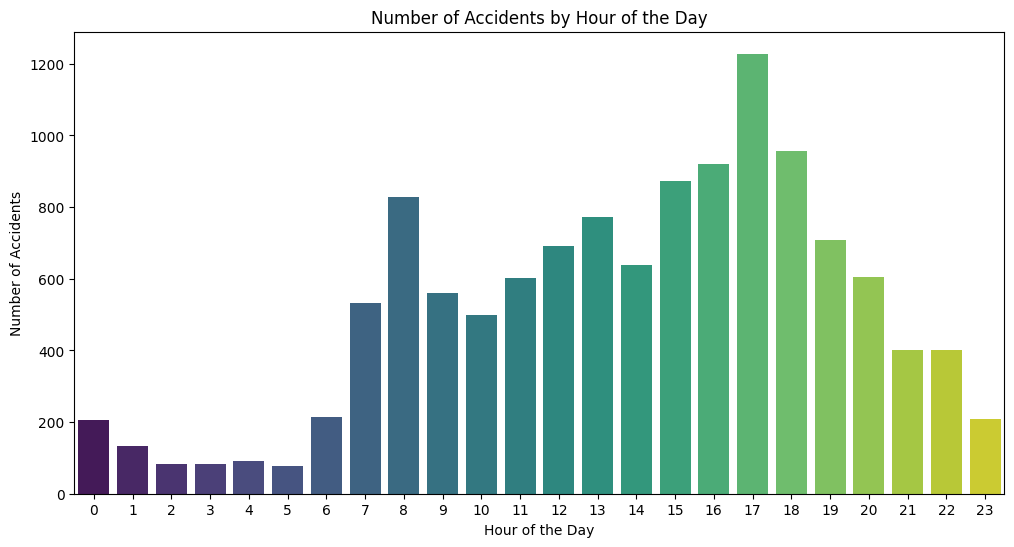

In [29]:
# Step 3: Time of Day Analysis
plt.figure(figsize=(12, 6))
sns.countplot(x='Hour', data=data, palette='viridis')
plt.title('Number of Accidents by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Accidents')
plt.show()

# **Analysis from Graph 1:**
The peak number of accidents occurs around 5 PM, which likely corresponds to rush hour when many people are commuting from work. This suggests that traffic density and possibly driver fatigue or distraction during these times contribute significantly to the occurrence of accidents.

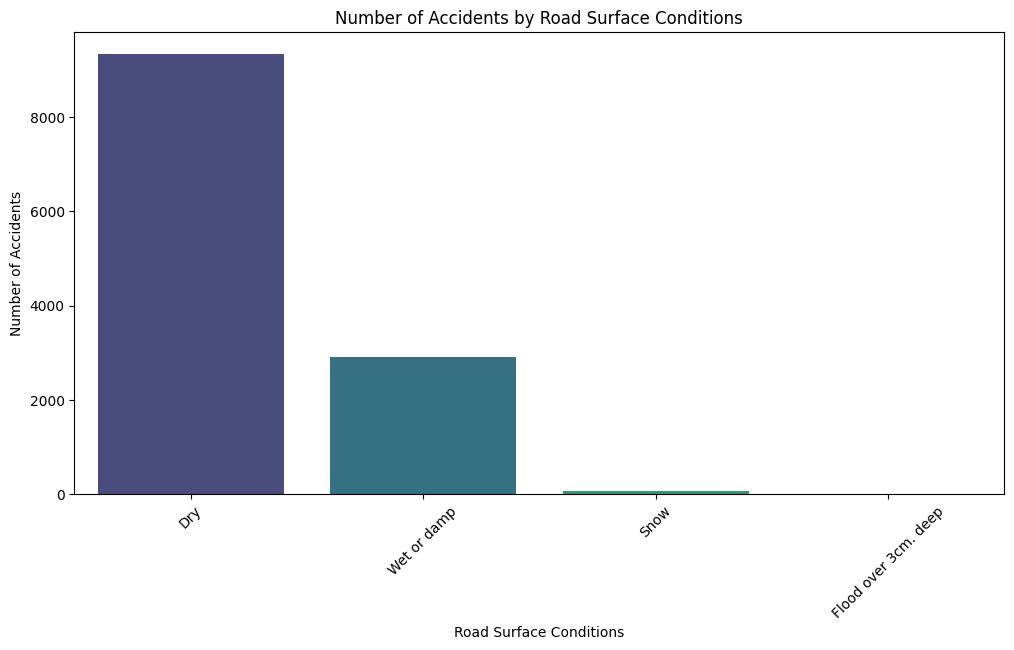

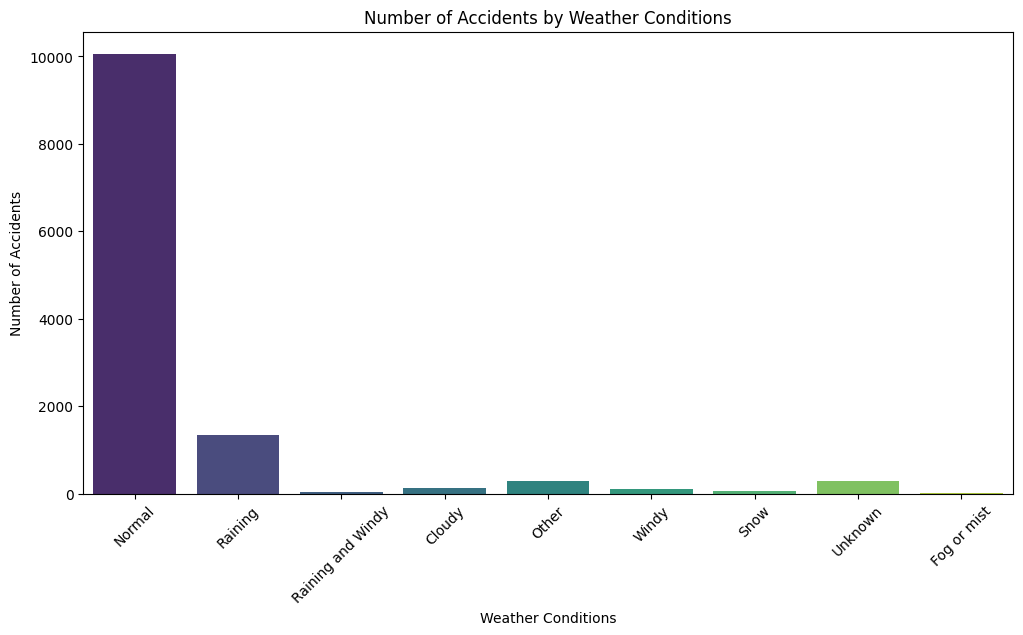

In [31]:
# Step 4: Road and Weather Conditions Analysis
plt.figure(figsize=(12, 6))
sns.countplot(x='Road_surface_conditions', data=data, palette='viridis')
plt.title('Number of Accidents by Road Surface Conditions')
plt.xlabel('Road Surface Conditions')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(x='Weather_conditions', data=data, palette='viridis')
plt.title('Number of Accidents by Weather Conditions')
plt.xlabel('Weather Conditions')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()

# **Analysis from Graph 2 and 3:**
1. **Graph 2:** *Most accidents occur on dry roads, which could be due to the higher volume of traffic in good weather conditions. However, a significant number of accidents also occur on wet or damp roads, indicating that adverse weather conditions still play a crucial role in traffic accidents, possibly due to reduced traction and visibility.*

2. **Graph 3:** *Major key takeaway from the graph is that the vast majority of accidents occur under "Normal" and "Rainy" weather conditions, significantly more than any other weather condition.*

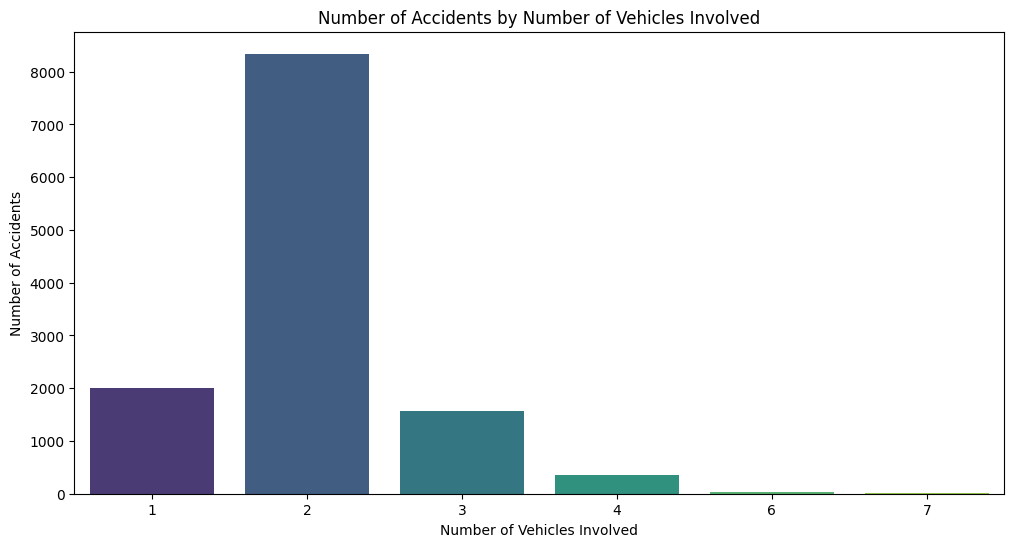

In [32]:
# Step 5: Analyze Number of Vehicles Involved
plt.figure(figsize=(12, 6))
sns.countplot(x='Number_of_vehicles_involved', data=data, palette='viridis')
plt.title('Number of Accidents by Number of Vehicles Involved')
plt.xlabel('Number of Vehicles Involved')
plt.ylabel('Number of Accidents')
plt.show()

# **Analysis from Graph 4:**
*The majority of accidents involve two vehicles. This points to typical collision scenarios such as rear-end collisions or side impacts, which are more common than single-vehicle accidents or those involving multiple vehicles.*

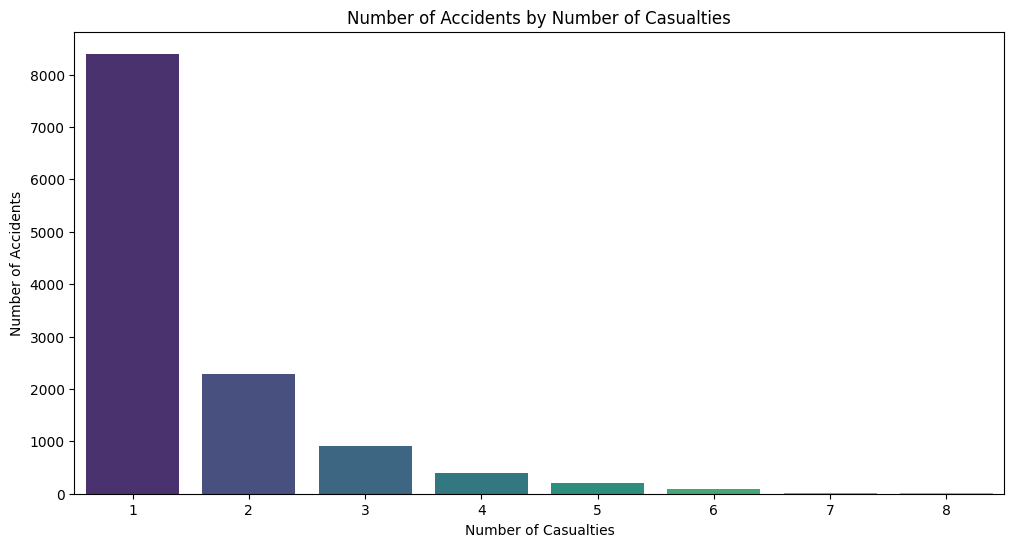

In [33]:
# Step 6: Analyze Number of Casualties
plt.figure(figsize=(12, 6))
sns.countplot(x='Number_of_casualties', data=data, palette='viridis')
plt.title('Number of Accidents by Number of Casualties')
plt.xlabel('Number of Casualties')
plt.ylabel('Number of Accidents')
plt.show()

In [37]:
# Step 7: Identify and Visualize Accident Hotspots
if 'Latitude' in data.columns and 'Longitude' in data.columns:
    base_map = folium.Map(location=[data['Latitude'].mean(), data['Longitude'].mean()], zoom_start=10)
    locations = data[['Latitude', 'Longitude']].dropna().values.tolist()
    HeatMap(locations).add_to(base_map)
    base_map.save('accident_hotspots.html')
else:
    print("Dataset does not contain location data for hotspot visualization.")

Dataset does not contain location data for hotspot visualization.
